In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.neighbors import DistanceMetric

# student name: Haonan Xu. Id: 7748987436 

### (a) Download and load Data Set

In [2]:
raw_data = pd.read_csv('../data/vertebral_column_data/column_2C.dat',header=None, sep=' ', engine='python',names=["pelvic incidence", "pelvic tilt", "lumbar lordosis angle","sacral slope", "pelvic radius", "grade of spondylolisthesis","label"])


In [3]:
raw_data

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,label
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


#   Problem  (b.i)  Scatterplots  

In [4]:
raw_data = raw_data.convert_dtypes()

In [5]:
raw_data

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,label
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


In [6]:
for x in range(310):
    if raw_data['label'][x] == 'AB':
        raw_data['label'][x] = '1'
    else:
        raw_data['label'][x] = '0'

In [7]:
raw_data['label'] = raw_data['label'].astype('int')

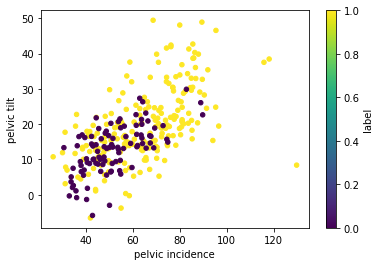

In [8]:
fig, ax = plt.subplots()
raw_data.plot(kind='scatter', x='pelvic incidence', y='pelvic tilt', s=20, c='label', cmap='viridis', ax=ax) 

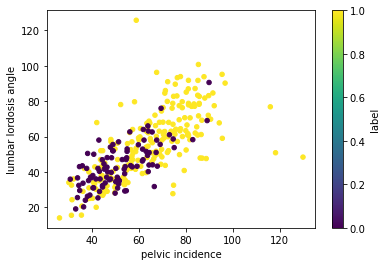

In [9]:
fig, bx = plt.subplots()
raw_data.plot(kind='scatter', x='pelvic incidence', y='lumbar lordosis angle', s=20, c='label', cmap='viridis', ax=bx) 

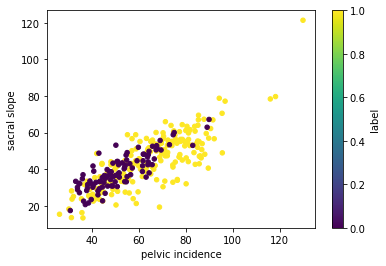

In [10]:
fig, cx = plt.subplots()
raw_data.plot(kind='scatter', x='pelvic incidence', y='sacral slope', s=20, c='label', cmap='viridis', ax=cx) 

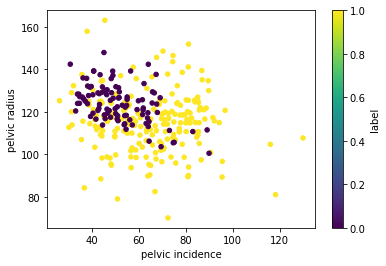

In [11]:
fig, dx = plt.subplots()
raw_data.plot(kind='scatter', x='pelvic incidence', y='pelvic radius', s=20, c='label', cmap='viridis', ax=dx) 

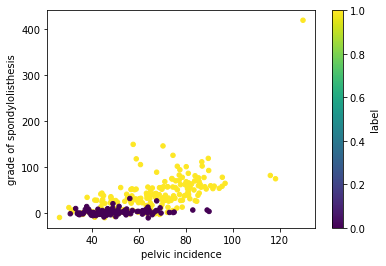

In [12]:
fig, ex = plt.subplots()
raw_data.plot(kind='scatter', x='pelvic incidence', y='grade of spondylolisthesis', s=20, c='label', cmap='viridis', ax=ex) 

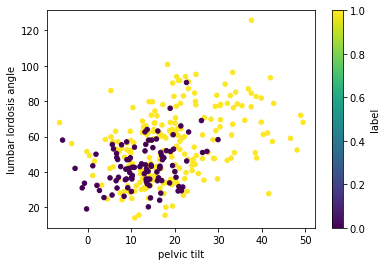

In [13]:
fig, fx = plt.subplots()
raw_data.plot(kind='scatter', x='pelvic tilt', y='lumbar lordosis angle', s=20, c='label', cmap='viridis', ax=fx) 

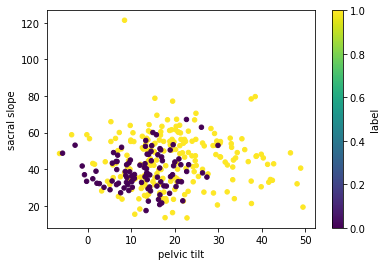

In [14]:
fig, gx = plt.subplots()
raw_data.plot(kind='scatter', x='pelvic tilt', y='sacral slope', s=20, c='label', cmap='viridis', ax=gx) 

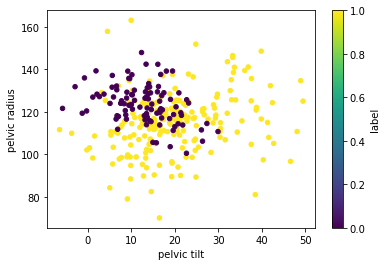

In [15]:
fig, hx = plt.subplots()
raw_data.plot(kind='scatter', x='pelvic tilt', y='pelvic radius', s=20, c='label', cmap='viridis', ax=hx) 

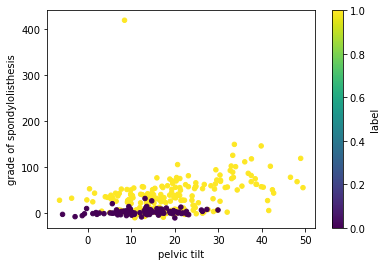

In [16]:
fig, ix = plt.subplots()
raw_data.plot(kind='scatter', x='pelvic tilt', y='grade of spondylolisthesis', s=20, c='label', cmap='viridis', ax=ix) 

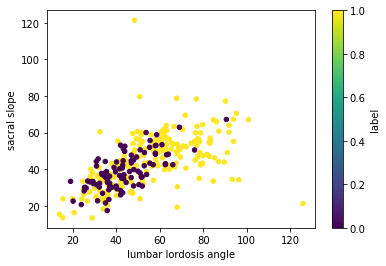

In [17]:
fig, jx = plt.subplots()
raw_data.plot(kind='scatter', x='lumbar lordosis angle', y='sacral slope', s=20, c='label', cmap='viridis', ax=jx) 

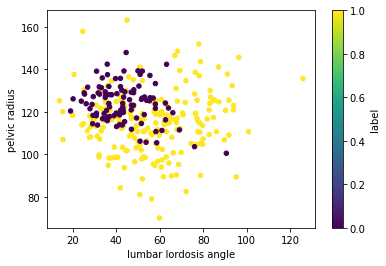

In [18]:
fig, kx = plt.subplots()
raw_data.plot(kind='scatter', x='lumbar lordosis angle', y='pelvic radius', s=20, c='label', cmap='viridis', ax=kx) 

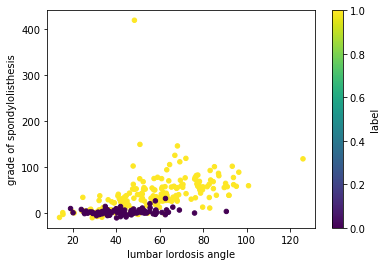

In [19]:
fig, lx = plt.subplots()
raw_data.plot(kind='scatter', x='lumbar lordosis angle', y='grade of spondylolisthesis', s=20, c='label', cmap='viridis', ax=lx) 

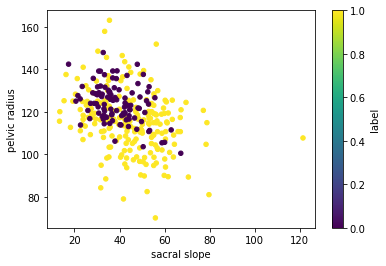

In [20]:
fig, mx = plt.subplots()
raw_data.plot(kind='scatter', x='sacral slope', y='pelvic radius', s=20, c='label', cmap='viridis', ax=mx) 

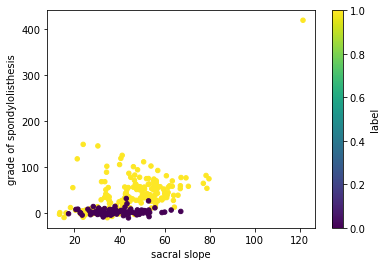

In [21]:
fig, nx = plt.subplots()
raw_data.plot(kind='scatter', x='sacral slope', y='grade of spondylolisthesis', s=20, c='label', cmap='viridis', ax=nx) 

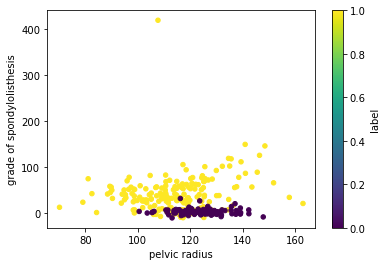

In [22]:
fig, ox = plt.subplots()
raw_data.plot(kind='scatter', x='pelvic radius', y='grade of spondylolisthesis', s=20, c='label', cmap='viridis', ax=ox) 

#  (b.ii) boxplots 

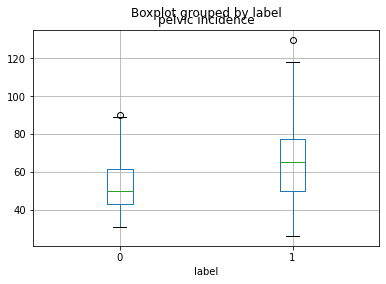

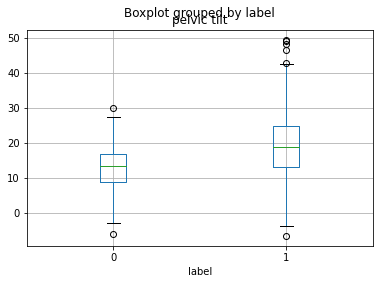

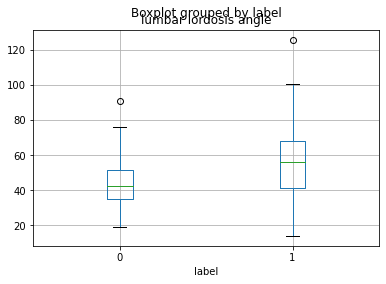

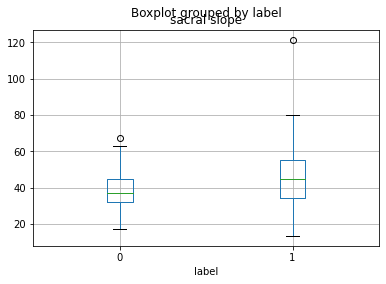

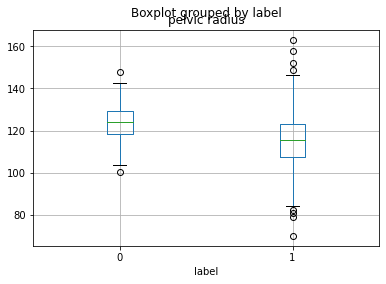

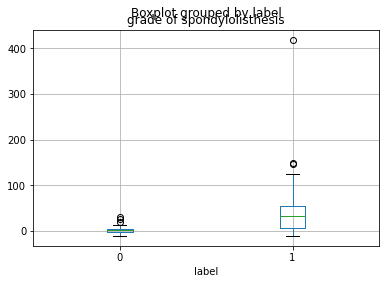

In [23]:
boxplot_1 = raw_data.boxplot(column='pelvic incidence' , by='label')
boxplot_2 = raw_data.boxplot(column='pelvic tilt' , by='label')
boxplot_3 = raw_data.boxplot(column='lumbar lordosis angle' , by='label')
boxplot_4 = raw_data.boxplot(column='sacral slope' , by='label')
boxplot_5 = raw_data.boxplot(column='pelvic radius' , by='label')
boxplot_6 = raw_data.boxplot(column='grade of spondylolisthesis' , by='label')

# (b.iii) 70 rows for class 0; 140 rows for class 1; rest for test set

In [24]:
#partition into 2 classes 1,0
one = raw_data.loc[raw_data['label'] == 1]
zero = raw_data.loc[raw_data['label'] == 0]

In [25]:
#select 140 rows from class one, and 70 rows from class zero, into train_set, the rest go to test_set.
#respectively
train_one_sample = one.sample(frac= 2/3, random_state=0)
test_one_sample = one.drop(train_one_sample.index)

train_zero_sample = zero.sample(frac= 7/10, random_state=0)
test_zero_sample = zero.drop(train_zero_sample.index)

In [26]:
#concatenate to train_set, and test_set
frames_train = [train_one_sample,train_zero_sample]
train_set = pd.concat(frames_train)

frames_test = [test_one_sample,test_zero_sample]
test_set = pd.concat(frames_test)

In [27]:
train_set

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,label
12,48.92,19.96,40.26,28.95,119.32,8.03,1
80,77.11,30.47,69.48,46.64,112.15,70.76,1
33,38.66,12.99,40.00,25.68,124.91,2.70,1
5,40.25,13.92,25.12,26.33,130.33,2.23,1
188,85.68,38.65,82.68,47.03,120.84,61.96,1
...,...,...,...,...,...,...,...
295,46.43,6.62,48.10,39.81,130.35,2.45,0
242,39.09,5.54,26.93,33.55,131.58,-0.76,0
294,46.24,10.06,37.00,36.17,128.06,-5.10,0
224,89.83,22.64,90.56,67.20,100.50,3.04,0


In [28]:
test_set

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,label
1,39.06,10.06,25.02,29.00,114.41,4.56,1
9,36.69,5.01,41.95,31.68,84.24,0.66,1
11,31.23,17.72,15.50,13.52,120.06,0.50,1
17,31.28,3.14,32.56,28.13,129.01,3.62,1
21,54.92,21.06,42.20,33.86,125.21,2.43,1
...,...,...,...,...,...,...,...
298,66.51,20.90,31.73,45.61,128.90,1.52,0
304,45.08,12.31,44.58,32.77,147.89,-8.94,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0


# (C.i.ii) KNN  

In [29]:
train_set_np = train_set.to_numpy()

In [30]:
test_set_np = test_set.to_numpy()

In [31]:
test_Y = test_set_np[:,6]
test_X = test_set_np[:, [0,1,2,3,4, 5]]

In [32]:
x1,x2,x3,x4,x5,x6,label = train_set_np[:, 0], train_set_np[:, 1],train_set_np[:, 2],train_set_np[:, 3],train_set_np[:, 4],train_set_np[:, 5],train_set_np[:, 6],


In [33]:
features=list(zip(x1,x2,x3,x4,x5,x6))

In [34]:
k = 1
knn_accuracy = []
k_val = []
error=[]
while True:
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(features,label)
  pred_Y = knn_model.predict(test_X)
  knn_accuracy.append(accuracy_score(test_Y,pred_Y))
  error.append(1-accuracy_score(test_Y,pred_Y))
  k_val.append(k)
  if k > 205:
    break
  k=k+3

In [35]:
knn_accuracy_np = np.asarray(knn_accuracy)

In [36]:
k_val_np = np.asarray(k_val)

In [37]:
error_np = np.asarray(error)

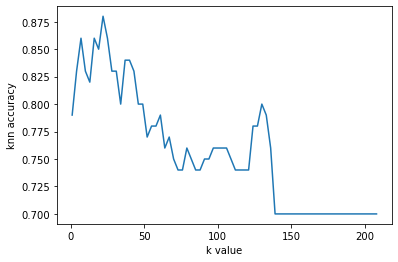

In [38]:
#plt.title("knn accuracy") 
x = k_val_np
y = knn_accuracy_np
plt.xlabel("k value") 
plt.ylabel("knn accuracy") 
plt.plot(x,y) 
plt.show()

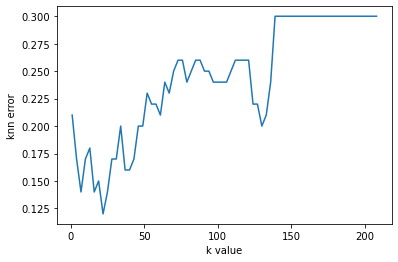

In [39]:
x = k_val_np
y = error_np
plt.xlabel("k value") 
plt.ylabel("knn error") 
plt.plot(x,y) 
plt.show()

In [40]:
combined = np.vstack((k_val_np, knn_accuracy_np)).T

In [41]:
print("Optimal K : ", k_val_np[np.argmin(error_np)], " ", "It has error rate: ", np.min(error_np))

Optimal K :  22   It has error rate:  0.12


In [42]:
knn_model_optimal = KNeighborsClassifier(n_neighbors=22)
knn_model_optimal.fit(features,label)
pred_Y_optimal = knn_model_optimal.predict(test_X)

In [43]:
labels = [0.0, 1.0]

In [44]:
cm = confusion_matrix(test_Y, pred_Y_optimal,labels) 

/Users/haonanxu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=[0.0, 1.0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


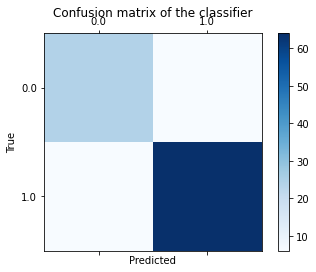

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm,cmap=plt.cm.Blues)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [46]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1.0:
           TP += 1
        if y_hat[i]==1.0 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0.0:
           TN += 1
        if y_hat[i]==0.0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [47]:
TP,FP,TN,FN = perf_measure(test_Y, pred_Y_optimal)

In [48]:
print("True Positive rate: ",TP/(TP+FN) )

True Positive rate:  0.9142857142857143


In [49]:
print("True Negative rate: ",TN/(TN+FP))

True Negative rate:  0.8


In [50]:
print("Precision Score: ",precision_score(test_Y, pred_Y_optimal))

Precision Score:  0.9142857142857143


In [51]:
print("F1 Score: ", f1_score(test_Y, pred_Y ))

F1 Score:  0.8235294117647058


# (C.iii)

In [52]:
#for each trian set, modeling on different k value
def train_model(t,N,test_X_2,test_Y_2):
    k=1
    k_value=[]
    knn_acc=[]
    error_2=[]
    a1,a2,a3,a4,a5,a6,label_2 = t[:, 0], t[:, 1],t[:, 2],t[:, 3],t[:, 4],t[:, 5],t[:, 6],
    features_2=list(zip(a1,a2,a3,a4,a5,a6))
    while True:
       knn_model_2 = KNeighborsClassifier(n_neighbors=k)
       knn_model_2.fit(features_2,label_2)
       pred_Y_2 = knn_model_2.predict(test_X_2)
       knn_acc.append(accuracy_score(test_Y_2,pred_Y_2))
       error_2.append(1-accuracy_score(test_Y_2,pred_Y_2))
       k_value.append(k)
       if k > N-5:
         break
       k=k+5
    return k_value, error_2

In [53]:
N=10
N_list = []
err_list=[]
while True:
  n_zero = N//3
  n_one = N-n_zero  
   
    
  t_zero = train_set_np[140:(n_zero+140), :]
  t_one = train_set_np[0:n_one, :] 
  t = np.concatenate((t_one,t_zero))

  k_value_2, err_2 = train_model(t,N,test_X,test_Y)
    
  k_value_arr = np.asarray(k_value_2)
  err_arr = np.asarray(err_2)
  opt_error = np.min(err_arr)
      
  N_list.append(N)
  err_list.append(opt_error)

  #pint("N: ",N,"k: ",k_value_arr, "error: ", err_arr, "optimal error: ",opt_error)  
  if N > 205:
    break
  N=N+10

N_arr = np.asarray(N_list)
optimal_error_arr = np.asarray(err_list)
print("train set size: ",N_arr)
print("error rate for each optimal k at each size ",optimal_error_arr)

train set size:  [ 10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170 180
 190 200 210]
error rate for each optimal k at each size  [0.24 0.18 0.14 0.16 0.15 0.15 0.18 0.18 0.16 0.15 0.13 0.14 0.17 0.15
 0.15 0.16 0.16 0.16 0.14 0.12 0.13]


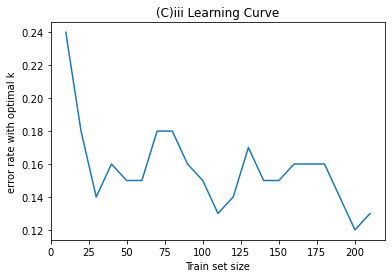

In [54]:
#Plot learning curve
plt.title("(C)iii Learning Curve")
x = N_arr
y = optimal_error_arr
plt.xlabel("Train set size") 
plt.ylabel("error rate with optimal k") 
plt.plot(x,y) 
plt.show()

# （d.i.A)

In [55]:
def train_model_metric(t,N,test_X_2,test_Y_2,p_val):
    k=1
    k_value=[]
    knn_acc=[]
    error_2=[]
    a1,a2,a3,a4,a5,a6,label_2 = t[:, 0], t[:, 1],t[:, 2],t[:, 3],t[:, 4],t[:, 5],t[:, 6],
    features_2=list(zip(a1,a2,a3,a4,a5,a6))
    while True:
       knn_model_2 = KNeighborsClassifier(n_neighbors=k,p=p_val)
       knn_model_2.fit(features_2,label_2)
       pred_Y_2 = knn_model_2.predict(test_X_2)
       knn_acc.append(accuracy_score(test_Y_2,pred_Y_2))
       error_2.append(1-accuracy_score(test_Y_2,pred_Y_2))
       k_value.append(k)
       if k > N-5:
         break
       k=k+5
    return k_value, error_2

In [56]:
k_manhattan, error_manhattan = train_model_metric(train_set_np,196,test_X,test_Y,1)

In [57]:
k_manhattan_arr = np.asarray(k_manhattan)
error_manhattan_arr = np.asarray(error_manhattan)
print("Optimal k for manhattan metrics is: ",k_manhattan_arr[np.argmin(error_manhattan_arr)]," ", "with error rate: ",np.min(error_manhattan_arr))

Optimal k for manhattan metrics is:  21   with error rate:  0.14


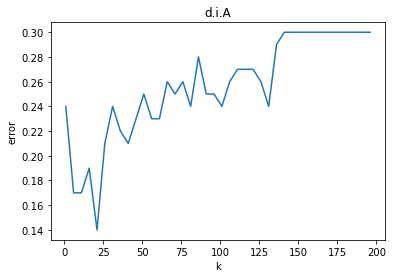

In [58]:
plt.title("d.i.A")
x = k_manhattan_arr
y = error_manhattan_arr
plt.xlabel("k") 
plt.ylabel("error") 
plt.plot(x,y) 
plt.show()

# （d.i.B)

In [59]:
i = 0.1
i_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
while i < 1:
  k_manhattan, error_manhattan = train_model_metric(train_set_np,196,test_X,test_Y,10**i)
  k_manhattan_arr = np.asarray(k_manhattan)
  error_manhattan_arr = np.asarray(error_manhattan)
  
  print("log10(p): ",i,"","","","","","","error with optimal k: ", min(error_manhattan_arr),"","","","","Optimal k : ",k_manhattan_arr[np.argmin(error_manhattan_arr)])
    
  i = i+0.1

log10(p):  0.1       error with optimal k:  0.12     Optimal k :  21
log10(p):  0.2       error with optimal k:  0.13     Optimal k :  21
log10(p):  0.30000000000000004       error with optimal k:  0.13     Optimal k :  21
log10(p):  0.4       error with optimal k:  0.15000000000000002     Optimal k :  21
log10(p):  0.5       error with optimal k:  0.16000000000000003     Optimal k :  16
log10(p):  0.6       error with optimal k:  0.15000000000000002     Optimal k :  16
log10(p):  0.7       error with optimal k:  0.14     Optimal k :  16
log10(p):  0.7999999999999999       error with optimal k:  0.14     Optimal k :  16
log10(p):  0.8999999999999999       error with optimal k:  0.14     Optimal k :  31
log10(p):  0.9999999999999999       error with optimal k:  0.15000000000000002     Optimal k :  11


In [60]:
print("Best log10(p) is 0.1 with error rate 0.12")

Best log10(p) is 0.1 with error rate 0.12


# （d.i.C)

In [61]:
k_manhattan, error_manhattan = train_model_metric(train_set_np,196,test_X,test_Y,float("inf"))

In [62]:
k_manhattan_arr = np.asarray(k_manhattan)
error_manhattan_arr = np.asarray(error_manhattan)
print("Optimal k for Chebyshev Distance is: ",k_manhattan_arr[np.argmin(error_manhattan_arr)], " ", "with error rate: ",np.min(error_manhattan_arr) )

Optimal k for Chebyshev Distance is:  11   with error rate:  0.13


# （d.ii)

In [63]:
def train_model_Mahalanobis (t,N,test_X_2,test_Y_2):
    k=1
    k_value=[]
    knn_acc=[]
    error_2=[]
    a1,a2,a3,a4,a5,a6,label_2 = t[:, 0], t[:, 1],t[:, 2],t[:, 3],t[:, 4],t[:, 5],t[:, 6],
    t_wo_label = t[:,0:6]
    train_df = pd.DataFrame(t_wo_label)
    cov = pd.DataFrame.cov(train_df)
    features_2=list(zip(a1,a2,a3,a4,a5,a6))
    while True:
       knn_model_2 = KNeighborsClassifier(n_neighbors=k,metric='mahalanobis',metric_params={'V': cov})
       knn_model_2.fit(features_2,label_2)
       pred_Y_2 = knn_model_2.predict(test_X_2)
       knn_acc.append(accuracy_score(test_Y_2,pred_Y_2))
       error_2.append(1-accuracy_score(test_Y_2,pred_Y_2))
       k_value.append(k)
       if k > N-5:
         break
       k=k+5
    return k_value, error_2

In [64]:
k_Mahalanobis, error_Mahalanobis = train_model_Mahalanobis(train_set_np,196,test_X,test_Y)

/Users/haonanxu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1456: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/Users/haonanxu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1456: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/Users/haonanxu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1456: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/Users/haonanxu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1456: FutureWarning: from version 0.25, pairwise_distances for metric='mahala

In [65]:
k_Mahalanobis_arr = np.asarray(k_Mahalanobis)
error_Mahalanobis_arr = np.asarray(error_Mahalanobis)

In [66]:
print("Optimal k for Mahalanobis Distance is: ",k_Mahalanobis_arr[np.argmin(error_Mahalanobis_arr)]," ", "with error rate: ", np.min(error_Mahalanobis_arr))

Optimal k for Mahalanobis Distance is:  36   with error rate:  0.18000000000000005


# (e)

In [67]:
def train_model_weight(t,N,test_X_2,test_Y_2,p_val):
    k=1
    k_value=[]
    knn_acc=[]
    error_2=[]
    a1,a2,a3,a4,a5,a6,label_2 = t[:, 0], t[:, 1],t[:, 2],t[:, 3],t[:, 4],t[:, 5],t[:, 6],
    features_2=list(zip(a1,a2,a3,a4,a5,a6))
    while True:
       knn_model_2 = KNeighborsClassifier(n_neighbors=k,weights='distance',p=p_val)
       knn_model_2.fit(features_2,label_2)
       pred_Y_2 = knn_model_2.predict(test_X_2)
       knn_acc.append(accuracy_score(test_Y_2,pred_Y_2))
       error_2.append(1-accuracy_score(test_Y_2,pred_Y_2))
       k_value.append(k)
       if k > N-5:
         break
       k=k+5
    return k_value, error_2

### Euclidean

In [68]:
k_weight_Euclidean, error_weight_Euclidean = train_model_weight(train_set_np,196,test_X,test_Y,2)

In [69]:
k_weight_Euclidean_arr = np.asarray(k_weight_Euclidean)
error_weight_Euclidean_arr = np.asarray(error_weight_Euclidean)

In [70]:
print("Optimal k for weight Euclidean Distance is: ",k_weight_Euclidean_arr [np.argmin(error_weight_Euclidean_arr)]," ", "with error rate: ", np.min(error_weight_Euclidean))

Optimal k for weight Euclidean Distance is:  21   with error rate:  0.13


### Manhattan

In [71]:
k_weight_Manhattan, error_weight_Manhattan = train_model_weight(train_set_np,196,test_X,test_Y,1)

In [72]:
k_weight_Manhattan_arr = np.asarray(k_weight_Manhattan)
error_weight_Manhattan_arr = np.asarray(error_weight_Manhattan)

In [73]:
print("Optimal k for weight Manhattan Distance is: ",k_weight_Manhattan_arr [np.argmin(error_weight_Manhattan_arr)]," ", "with error rate: ", np.min(error_weight_Manhattan))

Optimal k for weight Manhattan Distance is:  21   with error rate:  0.15000000000000002


### hebyshev

In [74]:
k_weight_hebyshev, error_weight_hebyshev = train_model_weight(train_set_np,196,test_X,test_Y,float("inf"))

In [75]:
k_weight_hebyshev_arr = np.asarray(k_weight_hebyshev)
error_weight_hebyshev_arr = np.asarray(error_weight_hebyshev)

In [76]:
print("Optimal k for weight hebyshev Distance is: ",k_weight_hebyshev_arr [np.argmin(error_weight_hebyshev_arr)]," ", "with error rate: ", np.min(error_weight_hebyshev))

Optimal k for weight hebyshev Distance is:  141   with error rate:  0.13


# (f)

In [77]:
print("Lowest training error rate: 0.12 !!!")

Lowest training error rate: 0.12 !!!
